In [71]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from scipy import sparse

In [72]:
# hàm softmax
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z/ e_Z.sum(axis = 0)
    return A

In [73]:
# phiên bản ổn định hơn của hàm softmax on
def softmax_stable(Z):
    e_Z = np.exp(Z)
    b = np.max(Z)
    A = (e_Z- b)/sum(e_Z - b)
    return A 

In [176]:
N = 4
d = 2
C = 4 
X = np.random.randn(d,N)
y = np.random.randint(0,4,(N))
print(y)

[3 2 2 1]


In [177]:
# chuyển đổi 1 label thành 1 vector dưới dạng one hot coding 
def convert_labels (y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y,np.arange(len(y)))),shape = (C,len(y))).toarray()
    return Y
Y = convert_labels(y,C)
print(Y)

[[0 0 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [1 0 0 0]]


In [178]:
# hàm cost_function
def cost(X,Y,W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))
W_init = np.random.randn(d,C)
# hàm gradient
def grad(X,Y,W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)

def numerical_grad(X,Y,W,cost):
    eps = 1e-6
    g = np.ones_like(W)
    for i in range (W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i,j] += eps
            W_n[i,j] -= eps
            g[i,j] = (cost(X,Y,W_p) - cost(X,Y,W_n))/(2*eps)
    return g
g1 = grad(X,Y,W_init)
g2 = numerical_grad(X,Y,W_init,cost)

print(np.linalg.norm(g1-g2))

7.680865576487593e-10


In [179]:
def softmax_regression(X,y,W_init,eta,tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y,C)
    it = 0 
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    
    while count < max_count :
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:,i].reshape(d,1)
            yi = Y[:,i].reshape(C,1)
            ai = softmax(np.dot(W[-1].T,xi))
            W_new = W[-1] + eta*xi.dot((yi- ai).T)
            count += 1
            # tiêu chí dừng 
            if count%check_w_after == 0 :
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = 0.05
d = X.shape[0]
W_init = np.random.randn(d,C)

W = softmax_regression(X,y,W_init,eta)

In [180]:
def pred (X,W):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A,axis = 0)

In [1]:
means = np.array([[2,2,2,2],[8,2,8,2],[2,8,2,8],[8,8,8,8]])# trung tâm xác suất 
cov = np.identity(4)
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0,X1,X2,X3),axis = 0).T

X = np.concatenate((np.ones((1,4*N)), X), axis = 0)
C = 4
original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T

plt.scatter(X0[:,0],X0[:,1],s = 100 ,marker = '+', color = 'r')
plt.scatter(X1[:,0],X1[:,1],s = 100, marker = '*',color = 'k')
plt.scatter(X2[:,0],X2[:,1],s = 100,marker= '^',color = 'y')
plt.scatter(X3[:,0],X3[:,1],s = 100,marker= 'o',color = 'g')

plt.scatter(means[0,0],means[0,1])
plt.scatter(means[1,0],means[1,1])
plt.scatter(means[2,0],means[2,1])
plt.scatter(means[3,0],means[3,1])

NameError: name 'np' is not defined

In [196]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W_init)


[[ 0.83204655  0.54249101  1.52740958 -0.61288109]
 [ 1.38073422  0.082198    0.48095102 -0.75940708]
 [ 1.49900569 -0.09500616  0.42241607  2.31791723]
 [-0.18813276  0.52005858  1.64524121 -1.32860596]
 [ 0.26617967 -1.58974201 -0.17766256  1.19063614]]


In [205]:
xm1 = np.arange(-2, 11, 0.25)
x1len = len(xm1)
xm2 = np.arange(-3, 10 ,0.25)
x2len = len(xm2)
xm3 = np.arange(-4, 9, 0.25)
x3len = len(xm3)
xm4 = np.arange(-5, 8, 0.25)
x4len = len(xm4)

xx1 , xx2 ,xx3, xx4  = np.meshgrid(xm1, xm2 ,xm3,xm4)

print(np.ones((1, xx1.size)).shape)

xx1 = xx1.ravel().reshape(1, xx1.size)
xx2 = xx2.ravel().reshape(1, xx2.size)
xx3 = xx3.ravel().reshape(1, xx3.size)
xx4 = xx4.ravel().reshape(1, xx4.size)

XX = np.concatenate((np.ones((1,xx1.size)),xx1 , xx2 ,xx3,xx4),axis = 0)

Z = pred(XX,W[-1])
print(XX)
Z
print(np.shape(Z))

(1, 7311616)
(5, 7311616)
[[ 1.    1.    1.   ...  1.    1.    1.  ]
 [-2.   -2.   -2.   ... 10.75 10.75 10.75]
 [-3.   -3.   -3.   ...  9.75  9.75  9.75]
 [-4.   -4.   -4.   ...  8.75  8.75  8.75]
 [-5.   -4.75 -4.5  ...  7.25  7.5   7.75]]
(7311616,)


TypeError: Input z must be at least a 2x2 array.

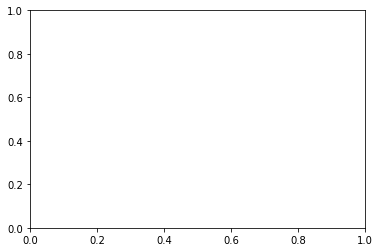

In [203]:
Z = Z.reshape(xx1.shape)

CS = plt.contourf(xx1, xx4, Z, 200, cmap= 'jet', alpha = .1)
plt.xlim(-2,11)
plt.ylim(-5,8)
plt.xticks(())
plt.yticks(())

display(X[1:,:],original_label)
plt.savefig('ex1.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [ ]:
xm1 = np.arange(-2, 11, 0.25)
x1len = len(xm1)
xm2 = np.arange(-3, 10 ,0.25)
x2len = len(xm2)
xm3 = np.arange(-4, 9, 0.25)
x3len = len(xm3)

xx1 , xx2 ,xx3  = np.meshgrid(xm1, xm2 ,xm3)

print(np.ones((1, xx1.size)).shape)

xx1 = xx1.ravel().reshape(1, xx1.size)
xx2 = xx2.ravel().reshape(1, xx2.size)
xx3 = xx3.ravel().reshape(1, xx3.size)


XX = np.concatenate((np.ones((1,xx1.size)),xx1 , xx2 ,xx3 ),axis = 0)

Z = pred(XX,W[-1])
Z
